In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('combined-13-18.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
print(new_data) #print the new dataframe with date and the target variable

#While splitting the data into train and validation set, we cannot use random splitting since that will destroy 
#the time component. So here we have set the latest one year’s data into validation and the 4 years’ data before that into training set.
# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

#In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
#making predictions

preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)
    
preds_1 = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-365+i:].sum() + sum(preds_1)
    b = a/248
    preds_1.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms1=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds_1),2)))
print('\n Method 1: RMSE value on validation set:')
print(rms)
print('\n Method 2: RMSE value on validation set:')
print(rms1)

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  

 Shape of the data:
(1235, 8)
                     Date   Close
0     2013-10-08 00:00:00   155.8
1     2013-10-09 00:00:00  155.55
2     2013-10-10 00:00:00  160.15
3     2013-10-11 00:00:00  160.05
4     2013-10-14 00:00:00  159.45
...                   ...     ...
1230  2018-10-01 00:00:00   230.9
1231  2018-10-03 00:00:00   227.6
1232  2018-10-04 00:00:00   218.2
1233  2018-10-05 00:00:00   

C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



 Predictions using Method-1:
                     Date   Close  Predictions
987   2017-10-09 00:00:00   208.3   152.306452
988   2017-10-10 00:00:00  208.45   152.310711
989   2017-10-11 00:00:00   209.4   152.313376
990   2017-10-12 00:00:00     212   152.331373
991   2017-10-13 00:00:00  210.25   152.327871
...                   ...     ...          ...
1230  2018-10-01 00:00:00   230.9   163.132287
1231  2018-10-03 00:00:00   227.6   162.960239
1232  2018-10-04 00:00:00   218.2   162.784877
1233  2018-10-05 00:00:00   209.2   162.614857
1234  2018-10-08 00:00:00  215.15   162.426005

[248 rows x 3 columns]

 Predictions using Method-2:
                     Date   Close  Predictions
987   2017-10-09 00:00:00   208.3   214.180645
988   2017-10-10 00:00:00  208.45   214.560003
989   2017-10-11 00:00:00   209.4   214.940285
990   2017-10-12 00:00:00     212   215.318270
991   2017-10-13 00:00:00  210.25   215.695360
...                   ...     ...          ...
1230  2018-10-01 00:00:

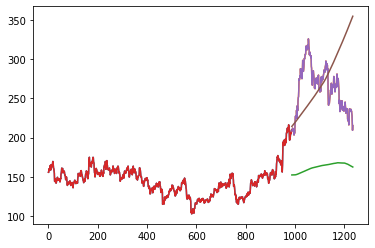

In [13]:
#plotting for Method-1 and Method-2
import matplotlib.pyplot as plt
#for Method-2
valid['Predictions'] = 0
valid['Predictions'] = preds
print('\n Predictions using Method-1:')
print(valid)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
#for Method-2
valid['Predictions'] = 0
valid['Predictions'] = preds_1
print('\n Predictions using Method-2:')
print(valid)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('combined-13-18.csv')
#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


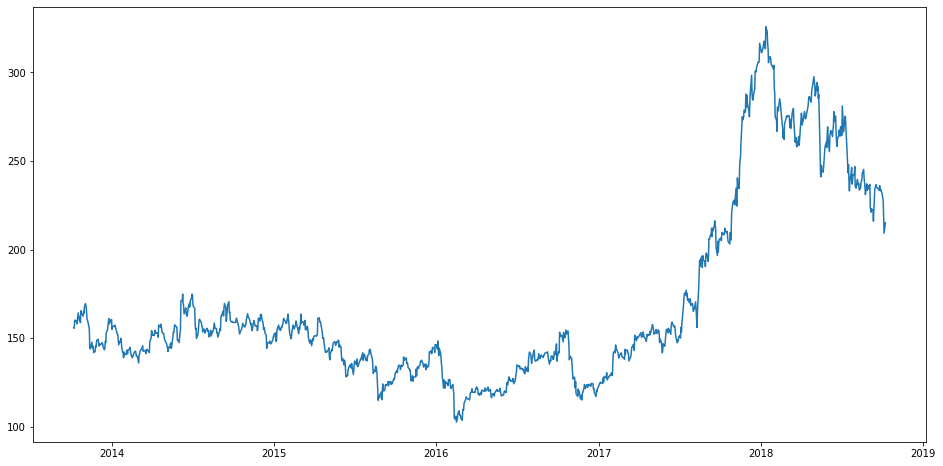

In [15]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

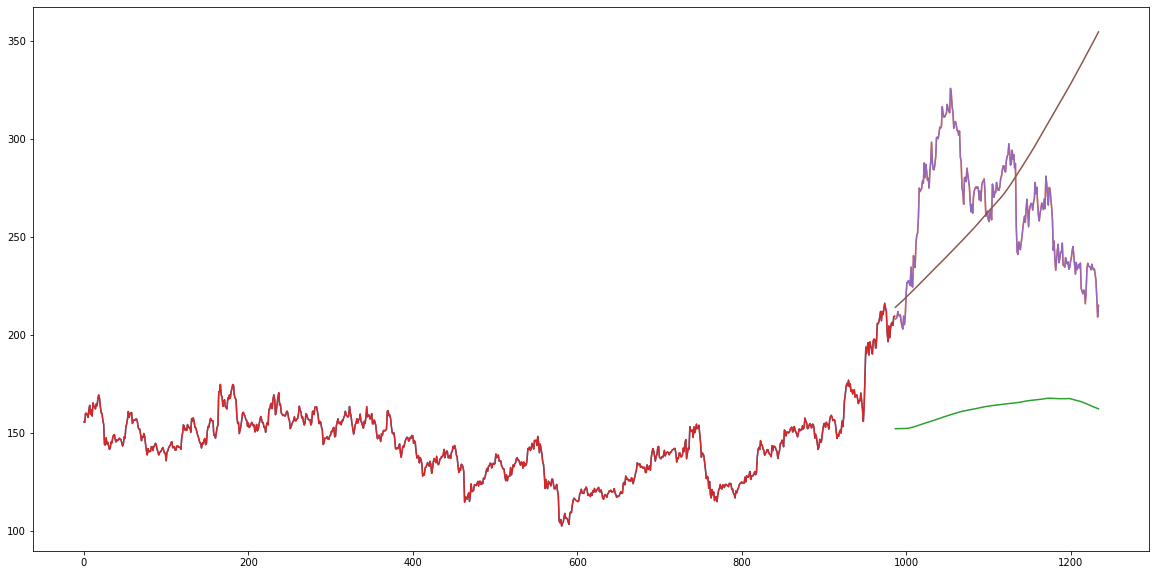

In [17]:
import matplotlib.pyplot as plt
#for Method-2
valid['Predictions'] = 0
valid['Predictions'] = preds

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
#for Method-2
valid['Predictions'] = 0
valid['Predictions'] = preds_1

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\NAZMUL HUSSAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


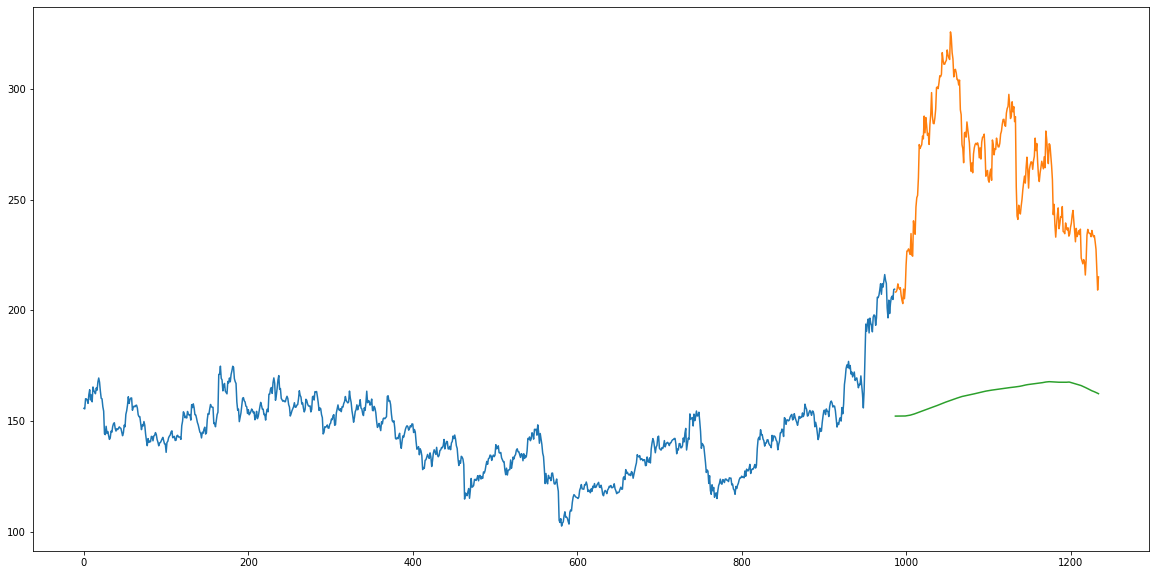

In [15]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [27]:
##########
#create features
from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

##########
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0
        
##########
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)   


##########
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

ModuleNotFoundError: No module named 'fastai'

In [28]:
#PROPHET
import pandas as pd
from fbprophet import Prophet

print(new_data)

ModuleNotFoundError: No module named 'fbprophet'

In [33]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:987]
valid = new_data[987:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

ModuleNotFoundError: No module named 'pystan'